# YouTube Trending Video Analysis

DSCI 235 - Final Project

Kristine Wiggins

github repository: https://github.com/kristinewiggins/DCSI235-FinalProject

### Description

Look at trending YouTube video data to see if there are specific factors that makes a successful YouTube video, focusing on United States data.


### Source of Data

Trending YouTube Video Statistics dataset. (https://www.kaggle.com/datasets/datasnaek/youtube-new?select=USvideos.csv) Contains data by country on number of views, likes, dislikes, title name, tags, data and time posted, number of shares, number of comments, category, and trending date.


### Motivation

This topic interests me because I like watching YouTube and want to see if there is some kind of formula for popularity of a video. I also think it would be an interesting topic to dive into deeper and see what insights I can figure out.

### Questions to Answer

1.	What are the best predictors of a successful YouTube video?
2.	What is the best time and day of the week to post?
3.	What are the most popular categories among trending videos?


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import calendar
import json

In [66]:
#load datasets
US_data = pd.read_csv("FinalProject/USvideos.csv")
US_cat = pd.read_json("FinalProject/US_category_id.json")

In [67]:
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight"
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/BachelorsPadTv\n\nVideo Effects: \nCaleb Natale | https://instagram.com/calebnatale\n\nPA:\nPaulina Gregory\n\n\nShots Studios Channels:\nAle

In [68]:
pd.set_option('display.max_colwidth', None)
US_cat

,kind,etag,items
0,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/Xy1mB4_yLrHy_BmKmPBggty2mZQ""', 'id': '1', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Film & Animation', 'assignable': True}}"
1,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/UZ1oLIIz2dxIhO45ZTFR3a3NyTA""', 'id': '2', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Autos & Vehicles', 'assignable': True}}"
2,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/nqRIq97-xe5XRZTxbknKFVe5Lmg""', 'id': '10', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Music', 'assignable': True}}"
3,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/HwXKamM1Q20q9BN-oBJavSGkfDI""', 'id': '15', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Pets & Animals', 'assignable': True}}"
4,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/9GQMSRjrZdHeb1OEM1XVQ9zbGec""', 'id': '17', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Sports', 'assignable': True}}"
5,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/FJwVpGCVZ1yiJrqZbpqe68Sy_OE""', 'id': '18', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Short Movies', 'assignable': False}}"
6,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/M-3iD9dwK7YJCafRf_DkLN8CouA""', 'id': '19', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Travel & Events', 'assignable': True}}"
7,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/WmA0qYEfjWsAoyJFSw2zinhn2wM""', 'id': '20', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Gaming', 'assignable': True}}"
8,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/EapFaGYG7K0StIXVf8aba249tdM""', 'id': '21', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'Videoblogging', 'assignable': False}}"
9,youtube#videoCategoryListResponse,"""m2yskBQFythfE4irbTIeOgYYfBU/S730Ilt-Fi-emsQJvJAAShlR6hM""","{'kind': 'youtube#videoCategory', 'etag': '""m2yskBQFythfE4irbTIeOgYYfBU/xId8RX7vRN8rqkbYZbNIytUQDRo""', 'id': '22', 'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ', 'title': 'People & Blogs', 'assignable': True}}"


## 1. What are the best predictors of a successful YouTube video?

Text(0, 0.5, 'Views')

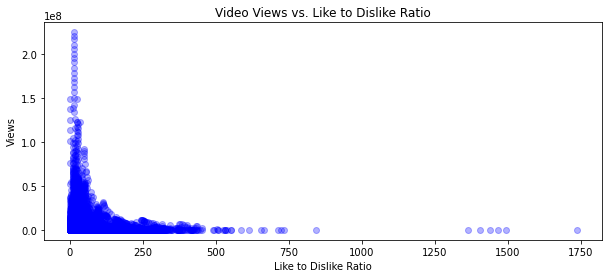

In [69]:
#Does like to dislike ratio relate to number of views?
US_data['like_ratio'] = US_data['likes'] / US_data['dislikes']

plt.figure().set_figwidth(10)
x = US_data['like_ratio']
y = US_data['views']
plt.scatter(x, y, color = "blue", alpha = 0.3)
plt.title("Video Views vs. Like to Dislike Ratio")
plt.xlabel("Like to Dislike Ratio")
plt.ylabel("Views")

Text(0, 0.5, 'Number of Dislikes')

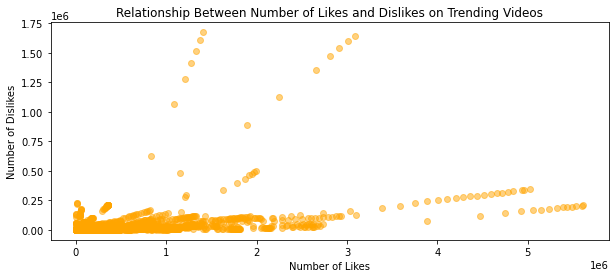

In [70]:
#Do videos with more likes also have more dislikes
plt.figure().set_figwidth(10)
x = US_data['likes']
y = US_data['dislikes']
plt.scatter(x, y, color = "orange", alpha = 0.5)
plt.title("Relationship Between Number of Likes and Dislikes on Trending Videos")
plt.xlabel("Number of Likes")
plt.ylabel("Number of Dislikes")

Text(0, 0.5, 'Views')

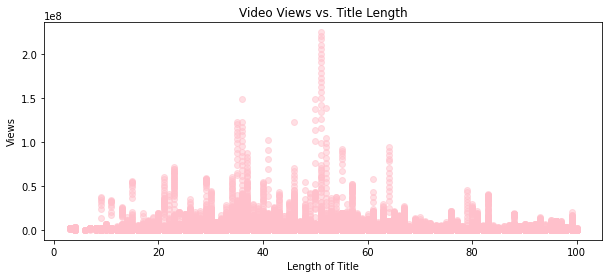

In [71]:
#Relationship between title length and views
title_length = US_data['title'].str.len()

plt.figure().set_figwidth(10)
x = title_length
y = US_data['views']
plt.scatter(x, y, color = "pink", alpha = 0.5)
plt.title("Video Views vs. Title Length")
plt.xlabel("Length of Title")
plt.ylabel("Views")

Text(0, 0.5, 'Number of Comments')

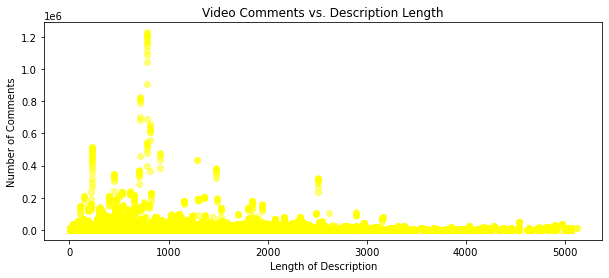

In [72]:
#Relationship between desciption length and number of comments
description_length = US_data['description'].str.len()

plt.figure().set_figwidth(10)
x = description_length
y = US_data['comment_count']
plt.scatter(x, y, color = "yellow", alpha = 0.5)
plt.title("Video Comments vs. Description Length")
plt.xlabel("Length of Description")
plt.ylabel("Number of Comments")

#### Conclusion

Videos with more dislikes than likes tend to gain more views than those with more likes, which is very surprising. Trending videos also seem to have a positive linear relationship between number of likes and dislikes, the more likes a  has the more dislikes it is likely to have. The length of the title also seems to have an effect on the amount of views a video recieves. On average, a video with a title of around 50 characters long get more views. Typically videos with a description of around 800 characters get more comments. Also, as the length of the description gets longer, the number of views decreases. 

## 2. What is the best time and day of the week to post?

In [73]:
#extract time posted
US_data['time_posted'] = US_data['publish_time'].str[11:16]
US_data['time_posted']

0        17:13
1        07:30
2        19:05
3        11:00
4        18:01
         ...  
40944    13:00
40945    01:00
40946    17:34
40947    17:00
40948    17:09
Name: time_posted, Length: 40949, dtype: object

In [74]:
#convert time to general time of day
hour = US_data['time_posted'].str[:2].astype(int)
hour

0        17
1         7
2        19
3        11
4        18
         ..
40944    13
40945     1
40946    17
40947    17
40948    17
Name: time_posted, Length: 40949, dtype: int32

In [75]:
US_data2 = US_data.copy()
US_data2.loc[((hour >= 0) & (hour <= 5)) | (hour == 0)] = "Morning"
US_data2.loc[(hour >= 6) & (hour <= 11)] = "Day"
US_data2.loc[(hour >= 12) & (hour <= 17)] = "Afternoon"
US_data2.loc[(hour >= 18) & (hour <= 23)] = "Night"
US_data2['time_posted']

0        Afternoon
1              Day
2            Night
3              Day
4            Night
           ...    
40944    Afternoon
40945      Morning
40946    Afternoon
40947    Afternoon
40948    Afternoon
Name: time_posted, Length: 40949, dtype: object

In [76]:
#most popular time of day to post
US_data2['time_posted'].mode()

0    Afternoon
dtype: object

In [77]:
#extract date posted
US_data['date_posted'] = US_data['publish_time'].str[:10]
US_data['date_posted']

0        2017-11-13
1        2017-11-13
2        2017-11-12
3        2017-11-13
4        2017-11-12
            ...    
40944    2018-05-18
40945    2018-05-18
40946    2018-05-18
40947    2018-05-17
40948    2018-05-17
Name: date_posted, Length: 40949, dtype: object

In [78]:
#US_data

In [79]:
US_data['date_posted'] = pd.to_datetime(US_data['date_posted'], format ="%Y-%m-%d")
US_data['date_posted']

0       2017-11-13
1       2017-11-13
2       2017-11-12
3       2017-11-13
4       2017-11-12
           ...    
40944   2018-05-18
40945   2018-05-18
40946   2018-05-18
40947   2018-05-17
40948   2018-05-17
Name: date_posted, Length: 40949, dtype: datetime64[ns]

In [80]:
#convert date posted to day of week
US_data['day_posted'] = US_data['date_posted'].dt.day_name()
US_data['day_posted']

0          Monday
1          Monday
2          Sunday
3          Monday
4          Sunday
           ...   
40944      Friday
40945      Friday
40946      Friday
40947    Thursday
40948    Thursday
Name: day_posted, Length: 40949, dtype: object

In [81]:
#most popular day to post of trending videos
US_data['day_posted'].mode()

0    Friday
dtype: object

In [82]:
#number of views by day of week
views_by_day = US_data.groupby('day_posted')['views'].sum()
views_by_day

day_posted
Friday       23622601358
Monday       12299195247
Saturday      6212414738
Sunday       10864844777
Thursday     16089783826
Tuesday      13938147018
Wednesday    13644783188
Name: views, dtype: int64

In [83]:
#number of likes by day of week
likes_by_day = US_data.groupby('day_posted')['likes'].sum()
likes_by_day

day_posted
Friday       773185360
Monday       357060219
Saturday     191717564
Sunday       338324561
Thursday     532821773
Tuesday      444856112
Wednesday    403181609
Name: likes, dtype: int64

In [84]:
#number of comments by day of week
comments_by_day = US_data.groupby('day_posted')['comment_count'].sum()
comments_by_day

day_posted
Friday       81780366
Monday       41682003
Saturday     25360119
Sunday       39658706
Thursday     49763909
Tuesday      52391078
Wednesday    55251983
Name: comment_count, dtype: int64

Text(0.5, 0.98, 'Video Views, Likes, and Comments by Day of Week Posted')

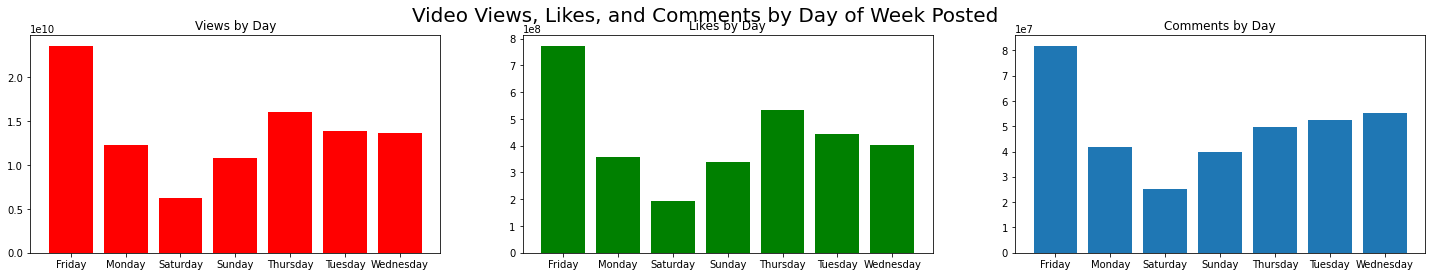

In [85]:
#Plots of Video Views, Likes, and Comments by Day of the Week video was posted
%matplotlib inline

x = ['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday']
y1 = views_by_day
y2 = likes_by_day
y3 = comments_by_day

plt.figure().set_figwidth(25)

plt.subplot(1,3,1)
plt.bar(x,y1, color = "red");
plt.title("Views by Day")

plt.subplot(1,3,2)
plt.bar(x,y2, color = "green");
plt.title("Likes by Day")

plt.subplot(1,3,3)
plt.bar(x,y3);
plt.title("Comments by Day")

plt.suptitle("Video Views, Likes, and Comments by Day of Week Posted", fontsize=20)


Text(0, 0.5, 'Number of Trending Videos')

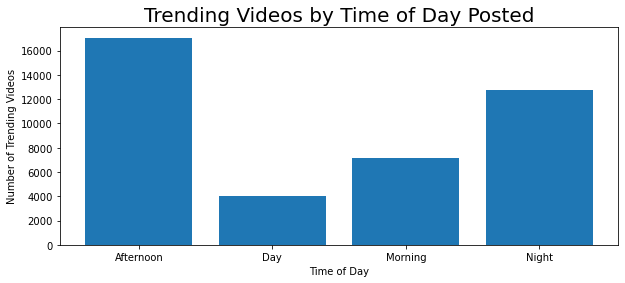

In [86]:
#Plot of videos by the time of day video of posted
plt.figure().set_figwidth(10)
y = np.array(US_data2.groupby('time_posted').count()['views'])
x = ["Afternoon", "Day", "Morning", "Night"]
plt.bar(x, y)
plt.title("Trending Videos by Time of Day Posted", fontsize = 20)
plt.xlabel("Time of Day")
plt.ylabel("Number of Trending Videos")

#### Conclusion

The best time to post a YouTube video is Friday afternoon. Videos posted on Fridays have gotten more views, likes, and comments compared to any other day of the week. Night time is also a common time to post among trending YouTube videos.

## 3.	What are the most popular categories among trending videos?


In [87]:
#Create dictionary of category ids to category names
IdToName = {}

for i in range(len(US_cat)):
    current = str(US_cat['items'][i])
    cat_id = current.split("'id': '")[1].split("', ")[0]
    cat_name = current.split("'title': '")[1].split("', ")[0]
    IdToName[cat_id] = cat_name
    
IdToName

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '29': 'Nonprofits & Activism',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [88]:
US_data['category_id'] = US_data['category_id'].astype(str)
type(US_data['category_id'][1])

str

In [89]:
US_data = US_data.replace({"category_id":IdToName})
US_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,like_ratio,time_posted,date_posted,day_posted
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,People & Blogs,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/shantellmartin\nCANDICE - https://www.lovebilly.com\n\nfilmed this video in 4k on this -- http://amzn.to/2sTDnRZ\nwith this lens -- http://amzn.to/2rUJOmD\nbig drone - http://tinyurl.com/h4ft3oy\nOTHER GEAR --- http://amzn.to/2o3GLX5\nSony CAMERA http://amzn.to/2nOBmnv\nOLD CAMERA; http://amzn.to/2o2cQBT\nMAIN LENS; http://amzn.to/2od5gBJ\nBIG SONY CAMERA; http://amzn.to/2nrdJRO\nBIG Canon CAMERA; http://tinyurl.com/jn4q4vz\nBENDY TRIPOD THING; http://tinyurl.com/gw3ylz2\nYOU NEED THIS FOR THE BENDY TRIPOD; http://tinyurl.com/j8mzzua\nWIDE LENS; http://tinyurl.com/jkfcm8t\nMORE EXPENSIVE WIDE LENS; http://tinyurl.com/zrdgtou\nSMALL CAMERA; http://tinyurl.com/hrrzhor\nMICROPHONE; http://tinyurl.com/zefm4jy\nOTHER MICROPHONE; http://tinyurl.com/jxgpj86\nOLD DRONE (cheaper but still great);http://tinyurl.com/zcfmnmd\n\nfollow me; on http://instagram.com/caseyneistat\non https://www.facebook.com/cneistat\non https://twitter.com/CaseyNeistat\n\namazing intro song by https://soundcloud.com/discoteeth\n\nad disclosure. THIS IS NOT AN AD. not selling or promoting anything. but samsung did produce the Shantell Video as a 'GALAXY PROJECT' which is an initiative that enables creators like Shantell and me to make projects we might otherwise not have the opportunity to make. hope that's clear. if not ask in the comments and i'll answer any specifics.,19.395482,17:13,2017-11-13,Monday
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with John Oliver (HBO),LastWeekTonight,Entertainment,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week tonight donald trump""|""john oliver trump""|""donald trump""",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John Oliver discusses what we've learned so far and enlists our catheter cowboy to teach Donald Trump what he hasn't.\n\nConnect with Last Week Tonight online...\n\nSubscribe to the Last Week Tonight YouTube channel for more almost news as it almost happens: www.youtube.com/user/LastWeekTonight\n\nFind Last Week Tonight on Facebook like your mom would: http://Facebook.com/LastWeekTonight\n\nFollow us on Twitter for news about jokes and jokes about news: http://Twitter.com/LastWeekTonight\n\nVisit our official site for all that other stuff at once: http://www.hbo.com/lastweektonight",15.812724,07:30,2017-11-13,Monday
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Lele Pons",Rudy Mancuso,Comedy,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""|""racist""|""superman""|""love""|""rudy mancuso poo bear black white official music video""|""iphone x by pineapple""|""lelepons""|""hannahstocking""|""rudymancuso""|""inanna""|""anwar""|""sarkis""|""shots""|""shotsstudios""|""alesso""|""anitta""|""brazil""|""Getting My Driver's License | Lele Pons""",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► https://www.youtube.com/channel/UC5jkXpfnBhlDjqh0ir5FsIQ?sub_confirmation=1\n\nTHANKS FOR WATCHING! LIKE & SUBSCRIBE FOR MORE VIDEOS!\n-----------------------------------------------------------\nFIND ME ON: \nInstagram | http://instagram.com/rudymancuso\nTwitter | http://twitter.com/rudymancuso\nFacebook | http://facebook.com/rudymancuso\n\nCAST: \nRudy Mancuso | http://youtube.com/c/rudymancuso\nLele Pons | http://youtube.com/c/lelepons\nKing Bach | https://youtube.com/user/

In [90]:
#Most popular video category
US_data['category_id'].mode()

0    Entertainment
dtype: object

In [91]:
#Number of trending videos per category
US_data['category_id'].value_counts()

Entertainment            9964
Music                    6472
Howto & Style            4146
Comedy                   3457
People & Blogs           3210
News & Politics          2487
Science & Technology     2401
Film & Animation         2345
Sports                   2174
Education                1656
Pets & Animals            920
Gaming                    817
Travel & Events           402
Autos & Vehicles          384
Nonprofits & Activism      57
Shows                      57
Name: category_id, dtype: int64

In [92]:
#Top 3 Categories
US_data['category_id'].value_counts()[:3]

Entertainment    9964
Music            6472
Howto & Style    4146
Name: category_id, dtype: int64

In [93]:
#Number of views per category 
US_data.groupby('category_id').sum()['views'].sort_values(ascending = False)

category_id
Music                    40132892190
Entertainment            20604388195
Film & Animation          7284156721
Comedy                    5117426208
People & Blogs            4917191726
Sports                    4404456673
Howto & Style             4078545064
Science & Technology      3487756816
Gaming                    2141218625
News & Politics           1473765704
Education                 1180629990
Pets & Animals             764651989
Autos & Vehicles           520690717
Travel & Events            343557084
Nonprofits & Activism      168941392
Shows                       51501058
Name: views, dtype: int64

In [94]:
#Top 3 most viewed categories
US_data.groupby('category_id').sum()['views'].sort_values(ascending = False)[:3]

category_id
Music               40132892190
Entertainment       20604388195
Film & Animation     7284156721
Name: views, dtype: int64

In [95]:
#Top 3 most liked categories
US_data.groupby('category_id').sum()['likes'].sort_values(ascending = False)[:3]

category_id
Music            1416838584
Entertainment     530516491
Comedy            216346746
Name: likes, dtype: int64

In [96]:
#Top 3 most commented categories
US_data.groupby('category_id').sum()['comment_count'].sort_values(ascending = False)[:3]

category_id
Music             125296396
Entertainment      73566498
People & Blogs     24778032
Name: comment_count, dtype: int64

Text(0, 0.5, 'Category')

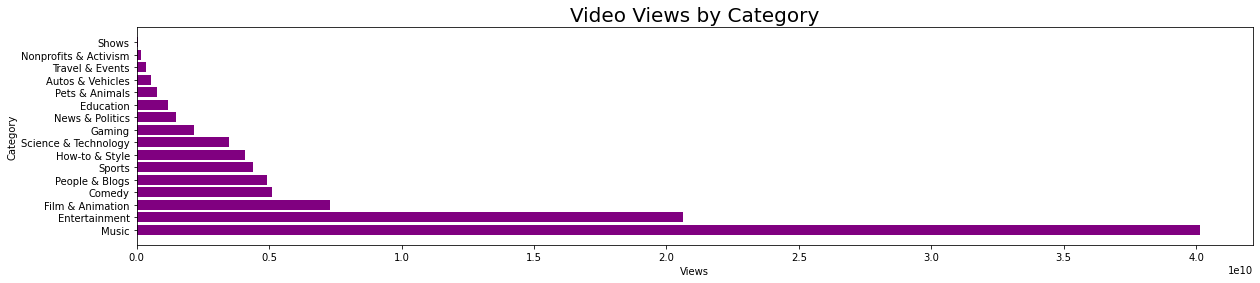

In [97]:
#Plot of number of views by category
plt.figure().set_figwidth(20)
y = np.array(US_data.groupby('category_id').sum()['views'].sort_values(ascending = False))
x = ['Music', 'Entertainment', 'Film & Animation', 'Comedy', 'People & Blogs', 'Sports',
    'How-to & Style', 'Science & Technology', 'Gaming', 'News & Politics', 'Education', 'Pets & Animals',
    'Autos & Vehicles', 'Travel & Events', 'Nonprofits & Activism', 'Shows']
plt.barh(x, y, color = "purple")
plt.title("Video Views by Category", fontsize = 20)
plt.xlabel("Views")
plt.ylabel("Category")

#### Conclusion

The category of YouTube video that is most successfull in terms of number of trending videos is Entertainment. But when it comes to number of views, the Music category is far ahead of the rest. The Entertainment category is also very popular among viewers. If it is likes you care about, the 3 categories with the most are Music, Entertainment, and Comedy. Whereas the top 3 categories when it comes to comments are Music, Entertainment, and People & Blogs.